In [ ]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
import calendar 
from datetime import datetime

In [ ]:
"""
1) 훈련, 테스트 데이터셋의 개괄적인 형태 및 데이터의 컬럼의 속성 및 값의 개수 파악
"""

#훈련데이터와 테스트 데이터 세트를 불러온다
train = pd.read_csv('bike/train.csv')
test = pd.read_csv('bike/test.csv')

In [ ]:
#훈련데이터 셋의 개괄적인 모형 파악
train.head()

### 각 칼럼의 의미

datetime - hourly date + timestamp <br> 
season -  1 = spring, 2 = summer, 3 = fall, 4 = winter <br>
holiday - whether the day is considered a holiday <br>
workingday - whether the day is neither a weekend nor holiday <br>
weather - 1: Clear, Few clouds, Partly cloudy, Partly cloudy <br>
2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist <br>
3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds <br>
4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog <br>
temp - temperature in Celsius<br>
atemp - "feels like" temperature in Celsius<br>
humidity - relative humidity<br>
windspeed - wind speed<br>
casual - number of non-registered user rentals initiated<br>
registered - number of registered user rentals initiated<br>
count - number of total rentals<br>


In [ ]:
train.info()

In [ ]:
#테스트 데이터 셋의 개괄적인 형태 출력
test.head()

In [35]:
""" 2) 데이터 전처리 및 시각화 """

#datetime속성을 분리하여 추출속성으로 활용하기 위해 split함수를 사용하여 년-월-일 과 시간을 분리한다.
train['tempDate'] = train.datetime.apply(lambda x:x.split())

In [36]:
#분리한 tempDate를 가지고 년-월-일을 이용하여 year,month,day 그리고 weekday column을 추출한다.
# split() 내장함수 설명: https://wikidocs.net/13 [문자형 자료형_ 문자열 나누기] <=> join() [문자형 자료형_ 문자열 삽입]

train['year'] = train.tempDate.apply(lambda x:x[0].split('-')[0])
train['month'] = train.tempDate.apply(lambda x:x[0].split('-')[1])
train['day'] = train.tempDate.apply(lambda x:x[0].split('-')[2])

#weekday는 calendar패키지와 datetime패키지를 활용한다.
#calendar.day_name 사용법 : https://stackoverflow.com/questions/36341484/get-day-name-from-weekday-int
#datetime.strptime 문서: https://docs.python.org/3/library/datetime.html#strftime-strptime-behavior
#파이썬에서 날짜와 시간 다루기: https://datascienceschool.net/view-notebook/465066ac92ef4da3b0aba32f76d9750a/ 
train['weekday'] = train.tempDate.apply(lambda x:calendar.day_name[datetime.strptime(x[0],"%Y-%m-%d").weekday()])

train['hour'] = train.tempDate.apply(lambda x:x[1].split(':')[0])

In [ ]:
train.info()

In [ ]:
#분리를 통해 추출된 속성은 문자열 속성을 가지고 있음 따라서 숫자형 데이터로 변환해 줄 필요가 있음.
#pandas.to_numeric(): https://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_numeric.html
train['year'] = pd.to_numeric(train.year,errors='coerce')
train['month'] = pd.to_numeric(train.month,errors='coerce')
train['day'] = pd.to_numeric(train.day,errors='coerce')
train['hour'] = pd.to_numeric(train.hour,errors='coerce')

In [ ]:
#year,month,day,hour가 숫자형으로 변환되었음을 알 수 있음.
train.info()

In [40]:
#필요를 다한 tempDate column을 drop함
train = train.drop('tempDate',axis=1)

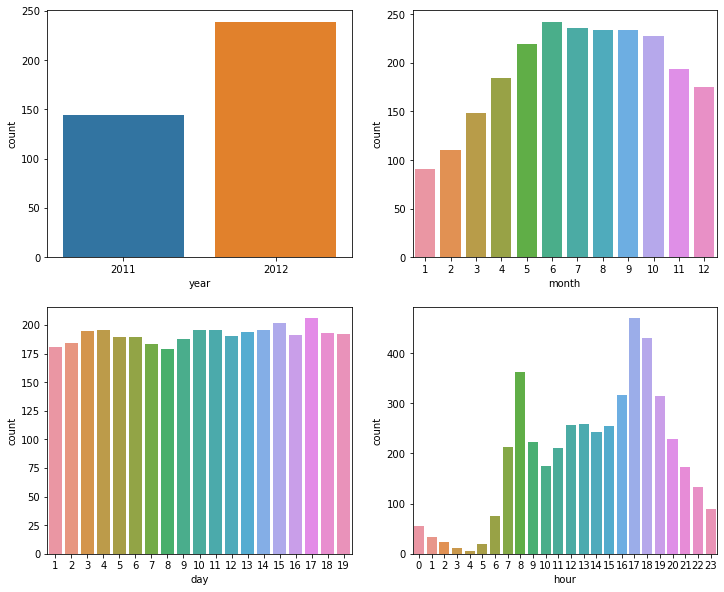

In [41]:
#각각의 속성과 예측의 결과값으로 쓰이는 count값과의 관계 파악

#년도와 count
fig = plt.figure(figsize=[12,10])
ax1 = fig.add_subplot(2,2,1)
ax1 = sns.barplot(x='year',y='count',data=train.groupby('year')['count'].mean().reset_index())

#month와 count
ax2 = fig.add_subplot(2,2,2)
ax2 = sns.barplot(x='month',y='count',data=train.groupby('month')['count'].mean().reset_index())

#day와 count
ax3 = fig.add_subplot(2,2,3)
ax3 = sns.barplot(x='day',y='count',data=train.groupby('day')['count'].mean().reset_index())

#hour와 count
ax4 = fig.add_subplot(2,2,4)
ax4 = sns.barplot(x='hour',y='count',data=train.groupby('hour')['count'].mean().reset_index())

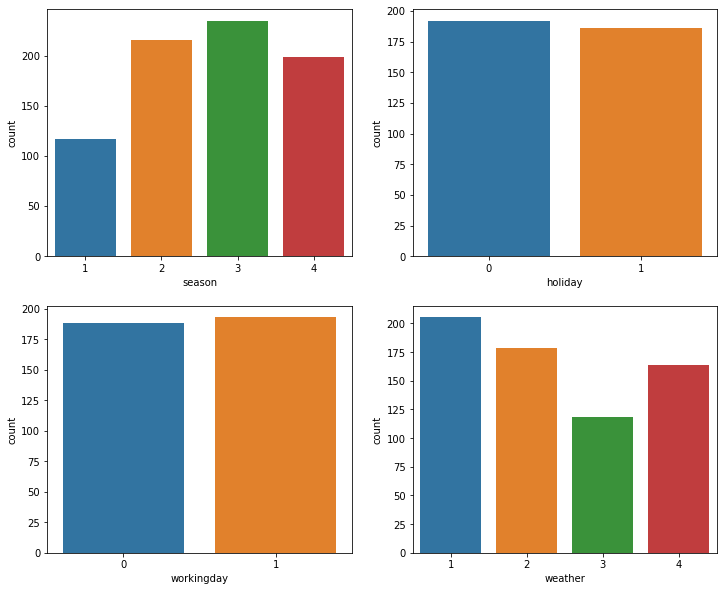

In [42]:
#계절과 count
fig = plt.figure(figsize=[12,10])
ax1 = fig.add_subplot(2,2,1)
ax1 = sns.barplot(x='season',y='count',data=train.groupby('season')['count'].mean().reset_index())

#휴일 여부와 count
ax2 = fig.add_subplot(2,2,2)
ax2 = sns.barplot(x='holiday',y='count',data=train.groupby('holiday')['count'].mean().reset_index())

#작업일 여부와 count
ax3 = fig.add_subplot(2,2,3)
ax3 = sns.barplot(x='workingday',y='count',data=train.groupby('workingday')['count'].mean().reset_index())

#날씨와 count
ax4 = fig.add_subplot(2,2,4)
ax4 = sns.barplot(x='weather',y='count',data=train.groupby('weather')['count'].mean().reset_index())

In [43]:
# 달에 따른 계절 변환

def month2season(month):
    if month in [12,1,2]:
        return 4
    elif month in [3,4,5]:
        return 1
    elif month in [6,7,8]:
        return 2
    elif month in [9,10,11]:
        return 3
    
train['season'] = train.month.apply(month2season)

In [ ]:
#계절과 count
fig = plt.figure(figsize=[12,10])
ax1 = fig.add_subplot(2,2,1)
ax1 = sns.barplot(x='season',y='count',data=train.groupby('season')['count'].mean().reset_index())

#휴일 여부와 count
ax2 = fig.add_subplot(2,2,2)
ax2 = sns.barplot(x='holiday',y='count',data=train.groupby('holiday')['count'].mean().reset_index())

#작업일 여부와 count
ax3 = fig.add_subplot(2,2,3)
ax3 = sns.barplot(x='workingday',y='count',data=train.groupby('workingday')['count'].mean().reset_index())

#날씨와 count
ax4 = fig.add_subplot(2,2,4)
ax4 = sns.barplot(x='weather',y='count',data=train.groupby('weather')['count'].mean().reset_index())


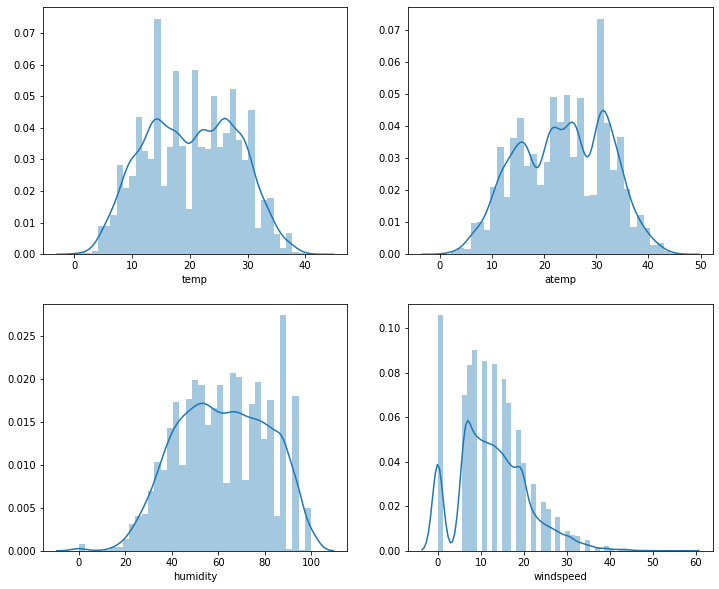

In [81]:
#온도와 count
fig = plt.figure(figsize=[12,10])
ax1 = fig.add_subplot(2,2,1)
ax1 = sns.distplot(train.temp)

#평균온도와 count
ax2 = fig.add_subplot(2,2,2)
ax2 = sns.distplot(train.atemp)

#습도와 count
ax3 = fig.add_subplot(2,2,3)
ax3 = sns.distplot(train.humidity)

#바람속도와 count
ax4 = fig.add_subplot(2,2,4)
ax4 = sns.distplot(train.windspeed)

In [ ]:
fig = plt.figure(figsize=[20,20])
ax = sns.heatmap(train.corr(),annot=True,square=True)

In [ ]:


#시간과 계절에 따른 count
fig = plt.figure(figsize=[12,10])
ax1 = fig.add_subplot(2,2,1)
ax1 = sns.pointplot(x='hour',y='count',hue='season',data=train.groupby(['season','hour'])['count'].mean().reset_index())

#시간과 휴일 여부에 따른 count
ax2 = fig.add_subplot(2,2,2)
ax2 = sns.pointplot(x='hour',y='count',hue='holiday',data=train.groupby(['holiday','hour'])['count'].mean().reset_index())

#시간과 휴일 여부에 따른 count
ax3 = fig.add_subplot(2,2,3)
ax3 = sns.pointplot(x='hour',y='count',hue='weekday',hue_order=['Sunday','Monday','Tuesday','Wendnesday','Thursday','Friday','Saturday'],data=train.groupby(['weekday','hour'])['count'].mean().reset_index())

#시간과 날씨에 따른 count
ax4 = fig.add_subplot(2,2,4)
ax4 = sns.pointplot(x='hour',y='count',hue='weather',data=train.groupby(['weather','hour'])['count'].mean().reset_index())